# Handwriting Recognition using K-Means

The U.S. Postal Service has been using machine learning and scanning technologies since 1999. Because its postal offices have to look at roughly half a billion pieces of mail every day, they have done extensive research and developed very efficient algorithms for reading and understanding addresses. And not only the post office:

- ATMs can recognize handwritten bank checks
- Evernote can recognize handwritten task lists
- Expensify can recognize handwritten receipts

But how do they do it?

In this project, I will be using K-means clustering (the algorithm behind this magic) and scikit-learn to cluster images of handwritten digits.

### Getting Started with the Dataset

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Let's see what the data looks like. 

In [4]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


Let's see what the target values. 

In [5]:
print(digits.target)

[0 1 2 ... 8 9 8]


Let's visualise the data images, i'll pick the image at index 100. 

<Figure size 432x288 with 0 Axes>

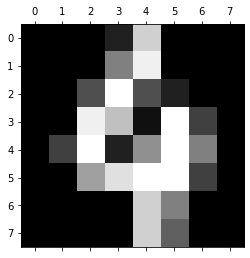

In [6]:
plt.gray() 
 
plt.matshow(digits.images[100])
 
plt.show()

Is it a 4? Let's print out the target label at index 100. 

In [7]:
print(digits.target[100])

4


### K-Means Clustering

As there is 10 digits (0-9) then there will be 10 clusters i.e k=10.

In [8]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=10, random_state=42)
model.fit(digits.data)

KMeans(n_clusters=10, random_state=42)

### Visualising after K-Means

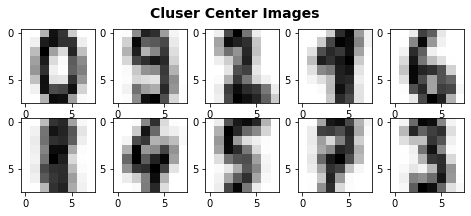

In [12]:
fig = plt.figure(figsize=(8, 3))
 
fig.suptitle('Cluser Center Images', fontsize=14, fontweight='bold')

for i in range(10):
 
  # Initialize subplots in a grid of 2X5, at i+1th position
  ax = fig.add_subplot(2, 5, 1 + i)
 
  # Display images
  ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

plt.show()

These are the centroids of handwriting from thirty different people collected by Bogazici University (Istanbul, Turkey):

- Index 0 looks like 0
- Index 1 looks like 9
- Index 2 looks like 2
- Index 3 looks like 1
- Index 4 looks like 6
- Index 5 looks like 8 (process of elimination)
- Index 6 looks like 4
- Index 7 looks like 5
- Index 8 looks like 7
- Index 9 looks like 3

Notice how the centroids that look like 1 (index 3) and 8 (index 5) look very similar and 1 and 4 (index 6) also look very similar.


### Testing the Model

I used a Codeacademy tool to generate an array of my handwriting of 2029. This is stored in the `new_samples` variable. 

In [13]:
new_samples = np.array([
[0.00,0.00,0.00,1.12,2.66,3.80,3.26,0.00,0.00,1.90,6.01,6.91,5.02,3.80,6.62,1.29,0.00,0.68,1.97,0.15,0.00,0.23,6.77,1.13,0.00,0.00,0.00,0.00,0.75,5.62,5.02,0.00,0.00,0.00,0.00,0.83,6.84,3.95,0.15,0.00,0.00,0.00,0.08,5.38,5.54,2.88,3.04,1.90,0.00,0.00,0.45,5.99,5.83,5.00,4.55,2.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.65,5.93,4.25,1.05,0.00,0.00,0.00,4.62,6.16,2.27,4.61,7.06,1.29,0.00,0.00,6.85,0.45,0.00,0.00,4.25,3.04,0.00,0.00,6.84,0.98,0.00,0.00,4.41,2.97,0.00,0.00,3.79,6.83,4.77,5.31,7.21,1.21,0.00,0.00,0.00,1.80,3.03,2.87,0.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,0.60,3.17,4.55,2.88,0.00,0.00,0.00,0.00,4.48,5.01,3.26,7.00,0.23,0.00,0.00,0.00,0.00,0.00,0.00,6.54,0.76,0.00,0.00,0.00,0.00,0.00,3.04,6.24,0.15,0.00,0.00,0.00,0.08,4.08,7.30,2.58,1.51,0.07,0.00,0.00,4.17,7.60,7.36,6.15,6.46,1.14,0.00,0.00,1.89,2.04,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.37,2.27,2.28,1.82,1.44,0.00,0.00,0.00,3.58,6.32,5.32,6.01,7.61,0.46,0.00,0.00,3.81,3.49,0.00,1.51,7.09,0.00,0.00,0.00,2.12,7.21,5.76,7.06,6.10,0.00,0.00,0.00,0.00,0.52,2.11,2.57,6.09,0.00,0.00,0.00,0.00,0.00,0.00,1.52,5.48,0.00,0.00,0.00,0.00,0.00,0.00,0.84,3.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00]
])

In [26]:
new_labels = model.predict(new_samples)
print(new_labels)

[8 6 8 7]


But wait, because this is a clustering algorithm, I don’t know which label is which.

By looking at the cluster centers, I will map out each of the labels with the digits we think it represents (using the index info above).

In [15]:
for i in range(len(new_labels)):
  if new_labels[i] == 0:
    print(0, end='')
  elif new_labels[i] == 1:
    print(9, end='')
  elif new_labels[i] == 2:
    print(2, end='')
  elif new_labels[i] == 3:
    print(1, end='')
  elif new_labels[i] == 4:
    print(6, end='')
  elif new_labels[i] == 5:
    print(8, end='')
  elif new_labels[i] == 6:
    print(4, end='')
  elif new_labels[i] == 7:
    print(5, end='')
  elif new_labels[i] == 8:
    print(7, end='')
  elif new_labels[i] == 9:
    print(3, end='')

7475

The input to the model was 2029 and the output of the model was 7475. Accuracy was very poor, or my handwriting was very poor! The model handwritten digits was from the 1990's.

I am going to try and replicate the handwriting more closely from the image outputs above. 

In [30]:
new_samples_2 = np.array([
[0.00,0.23,4.71,6.85,6.85,3.05,0.00,0.00,0.23,6.01,5.78,1.29,2.36,6.63,0.00,0.00,0.99,5.10,0.23,0.00,0.76,6.86,0.00,0.00,0.00,0.00,0.00,0.00,2.21,6.55,0.00,0.00,0.00,0.00,0.00,0.38,6.48,3.04,0.00,0.00,0.00,0.00,0.46,5.79,5.71,0.15,0.00,0.00,0.00,0.76,6.10,6.86,2.51,3.05,1.30,0.00,0.00,4.26,7.08,5.86,5.32,5.02,2.06,0.00],
[0.00,0.00,1.52,7.47,7.47,4.03,0.00,0.00,0.00,0.00,4.87,4.49,0.99,7.38,1.14,0.00,0.00,0.08,7.16,1.21,0.00,5.10,3.05,0.00,0.00,0.99,7.16,0.00,0.00,4.56,3.05,0.00,0.00,2.28,5.79,0.00,0.00,4.79,3.05,0.00,0.00,2.28,5.34,0.00,0.00,5.33,2.44,0.00,0.00,1.82,6.63,0.08,0.00,5.86,2.13,0.00,0.00,0.15,6.62,5.41,4.80,7.30,1.06,0.00],
[0.00,0.08,3.72,7.23,5.93,7.47,0.08,0.00,0.00,4.64,6.46,1.97,0.00,7.16,0.76,0.00,0.00,3.81,0.53,0.00,0.99,7.47,0.38,0.00,0.00,0.00,0.00,0.00,5.26,4.72,0.00,0.00,0.00,0.00,0.00,2.97,6.78,0.30,0.00,0.00,0.00,0.00,0.84,7.24,2.28,0.00,0.00,0.00,0.00,0.00,4.95,5.94,1.91,2.29,2.06,0.00,0.00,1.21,7.30,6.09,6.08,5.33,5.11,0.00],
[0.00,0.00,5.87,6.63,6.86,1.75,0.00,0.00,0.00,0.61,7.47,0.30,5.94,3.89,0.00,0.00,0.00,0.68,7.32,0.68,3.81,5.72,0.00,0.00,0.00,0.00,4.56,7.31,7.23,7.24,0.23,0.00,0.00,0.00,0.00,0.61,0.76,7.01,0.76,0.00,0.00,0.00,0.00,0.00,0.38,7.39,0.61,0.00,0.00,0.00,0.00,0.00,1.67,6.86,0.00,0.00,0.00,0.00,2.97,6.40,7.39,4.11,0.00,0.00]
])

In [31]:
new_labels_2 = model.predict(new_samples_2)
print(new_labels_2)

for i in range(len(new_labels_2)):
  if new_labels_2[i] == 0:
    print(0, end='')
  elif new_labels_2[i] == 1:
    print(9, end='')
  elif new_labels_2[i] == 2:
    print(2, end='')
  elif new_labels_2[i] == 3:
    print(1, end='')
  elif new_labels_2[i] == 4:
    print(6, end='')
  elif new_labels_2[i] == 5:
    print(8, end='')
  elif new_labels_2[i] == 6:
    print(4, end='')
  elif new_labels_2[i] == 7:
    print(5, end='')
  elif new_labels_2[i] == 8:
    print(7, end='')
  elif new_labels_2[i] == 9:
    print(3, end='')

[8 0 8 1]
7079

I used the same Codecademy tool again to generate an array based on 2029 trying to match the samples more closely, as you can see to out of the fours numbers was correct. It would seem my 2's are very close to 7'2 for this model.

Trying something more simple, let's try 3333. 

In [32]:
new_samples_3 = np.array([
[0.00,0.46,4.88,5.87,7.63,3.66,0.00,0.00,0.15,5.87,5.11,2.29,1.98,7.40,0.00,0.00,1.30,6.48,0.23,0.00,0.00,7.62,0.00,0.00,0.00,0.00,0.00,0.00,3.28,7.02,0.00,0.00,0.00,0.00,0.00,5.41,7.32,7.40,3.13,0.00,0.00,0.00,0.00,0.99,0.38,2.29,6.10,0.00,0.00,0.00,0.00,0.23,2.59,6.40,4.80,0.00,0.00,5.19,6.86,7.55,6.48,3.20,0.23,0.00],
[0.00,0.23,4.12,6.41,7.63,7.17,4.88,0.00,0.15,5.79,5.79,2.29,0.53,2.29,5.34,0.00,0.38,4.65,0.23,0.00,0.00,4.42,5.11,0.00,0.00,0.00,0.00,3.13,5.95,7.32,1.15,0.00,0.00,0.00,0.00,3.89,4.57,6.71,3.59,0.00,0.00,0.00,0.00,0.00,0.00,3.74,4.42,0.00,0.00,0.00,0.00,0.00,0.08,5.11,3.81,0.00,0.00,0.84,5.34,5.64,7.09,6.48,0.99,0.00],
[0.00,0.69,4.96,7.55,6.79,6.18,0.15,0.00,0.00,5.57,5.19,1.07,0.08,6.40,2.06,0.00,0.00,0.46,0.00,0.00,0.00,5.57,2.29,0.00,0.00,0.00,0.00,1.60,4.58,7.32,0.92,0.00,0.00,0.00,0.46,6.02,6.10,7.09,3.36,0.00,0.00,0.00,0.00,0.00,0.00,2.90,5.19,0.00,0.00,0.00,0.00,0.00,0.00,2.82,5.34,0.00,0.00,0.31,4.65,5.87,6.94,7.40,3.51,0.00],
[0.00,2.97,7.24,7.02,7.09,5.87,2.36,0.00,0.00,6.64,2.06,0.08,1.15,4.27,4.57,0.00,0.00,1.75,0.08,0.00,1.30,6.94,3.05,0.00,0.00,0.00,0.00,1.60,6.86,4.35,0.00,0.00,0.00,0.00,2.29,7.55,7.32,7.32,1.22,0.00,0.00,0.00,0.38,1.15,0.00,5.41,2.29,0.00,0.00,0.00,0.00,0.00,0.08,6.02,2.29,0.00,0.00,2.06,4.12,5.41,6.71,6.48,0.61,0.00]
])

In [33]:
new_labels_3 = model.predict(new_samples_3)
print(new_labels_3)

for i in range(len(new_labels_3)):
  if new_labels_3[i] == 0:
    print(0, end='')
  elif new_labels_3[i] == 1:
    print(9, end='')
  elif new_labels_3[i] == 2:
    print(2, end='')
  elif new_labels_3[i] == 3:
    print(1, end='')
  elif new_labels_3[i] == 4:
    print(6, end='')
  elif new_labels_3[i] == 5:
    print(8, end='')
  elif new_labels_3[i] == 6:
    print(4, end='')
  elif new_labels_3[i] == 7:
    print(5, end='')
  elif new_labels_3[i] == 8:
    print(7, end='')
  elif new_labels_3[i] == 9:
    print(3, end='')

[9 1 9 9]
3933

This time it is a lot closer!